# Time Series and Change Point Analysis

### Add project path to system path

In [2]:
import pandas as pd
import os
import sys
import warnings
warnings.filterwarnings("ignore")
# Append the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../')))

### Import modules

In [3]:
from script.change_point_analysis import Analyzer
analyzer=Analyzer()

ModuleNotFoundError: No module named 'ruptures'

### Load data

In [4]:
brent_oil_price_data=pd.read_csv("../data/brent_oil_price_data.csv")

## Change Point Analysis

### CUSUM Method

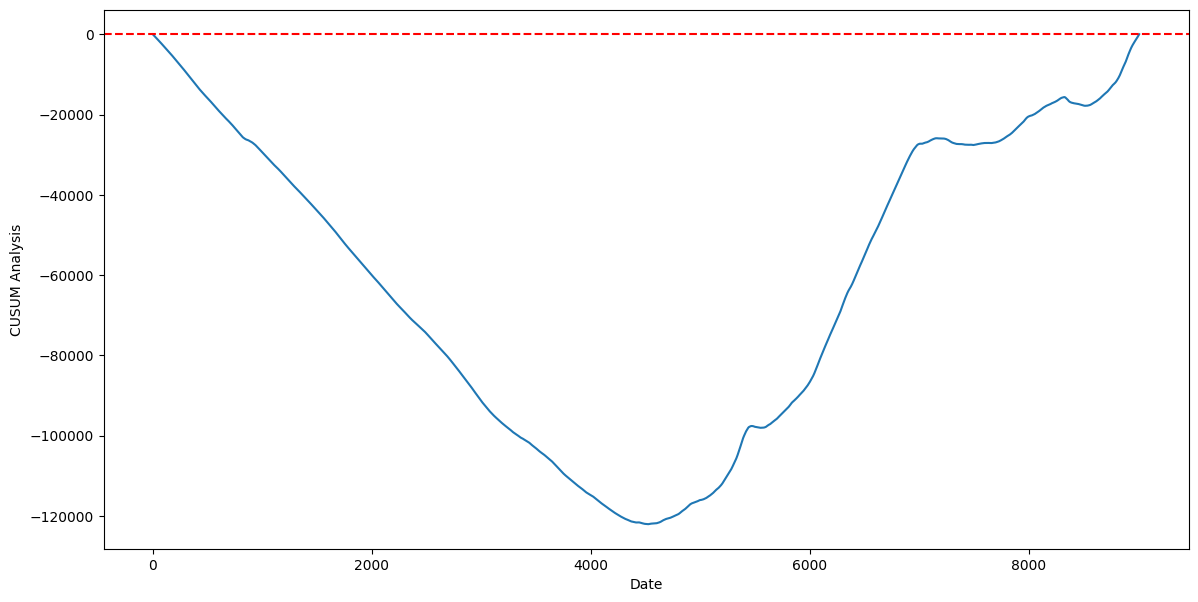

In [5]:
analyzer.cusum_plot(brent_oil_price_data)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# import ruptures as rpt
import pymc as pm

df=brent_oil_price_data
mean_price=df['Price'].mean()

with pm.Model() as model:
    #Prior
    mean_prior=pm.Normal('mean_prior',mu=mean_price,sigma=10)
    change_point=pm.DiscreteUniform('change_point',lower=0,upper=len(df)-1)
    #Likelyhood
    likelyhood=pm.Normal('likelyhood',mu=mean_prior,sigma=10,observed=df['Price'])
    #Inference
    trace=pm.sample(1000, tune=1000,cores=2)

#plot result
pm.plot_posterior(trace)
plt.show()

## Ruptures Method

Change Point Dates (actual dates): ['1990-08-06', '1991-01-16', '1997-12-29', '1999-08-09', '2003-12-29', '2004-07-27', '2005-06-16', '2007-05-18', '2007-10-24', '2008-04-11', '2008-09-03', '2008-10-15', '2009-05-21', '2009-10-13', '2010-11-30', '2011-02-17', '2012-05-15', '2014-09-08', '2014-12-02', '2015-08-04', '2016-05-10', '2017-09-19', '2018-04-10', '2018-11-08', '2020-03-09', '2020-05-21', '2021-01-06', '2021-06-01', '2022-02-04', '2022-08-04']


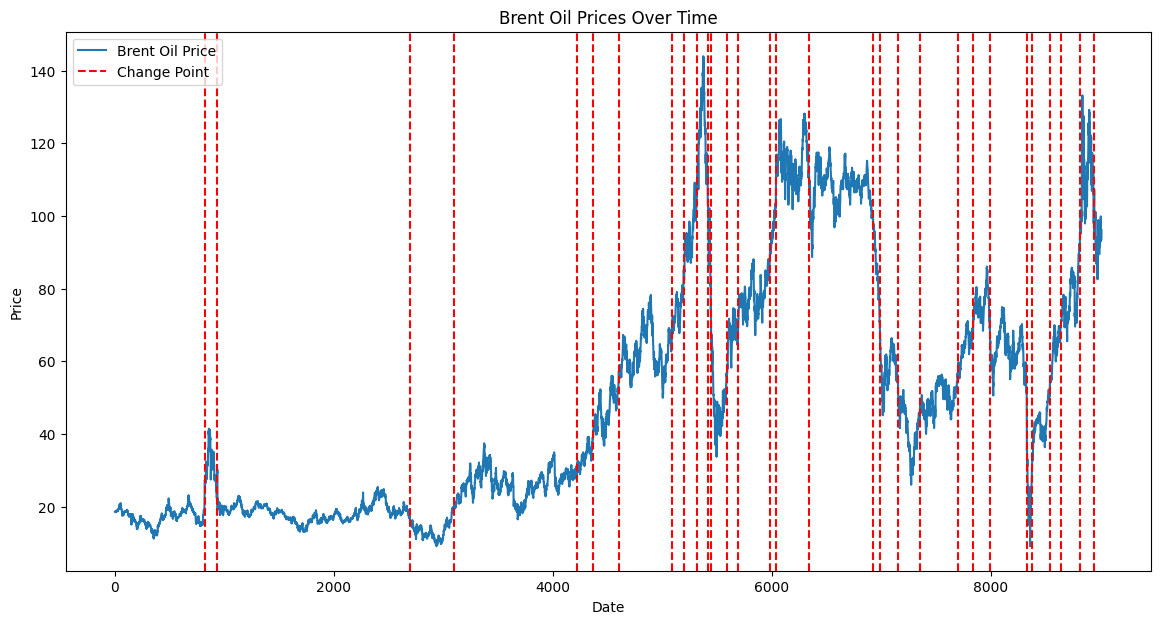

In [6]:
analyzer.rpt_change_point_detection(brent_oil_price_data)

### Interpretation
Change points are instances in a time series where the statistical properties of the data change
abruptly. In the context of Brent oil prices, these could be caused by factors such as:
- **Geopolitical events**: Wars, political instability, sanctions, etc.
- **Economic shocks**: Recessions, financial crises, changes in interest rates, etc.• Supply disruptions: Natural disasters, production outages, OPEC decisions, etc.
- **Technological advancements**: Fracking revolution, renewable energy adoption, etc.

Thirty different days are identified from the analysis. These days are days at which a major
international big event happens that affect the price of brent oil.

**List of dates of change points** : ['1990-08-06', '1991-01-16', '1997-12-29', '1999-08-09', '2003-
12-29', '2004-07-27', '2005-06-16', '2007-05-18', '2007-10-24', '2008-04-11', '2008-09-03',
'2008-10-15', '2009-05-21', '2009-10-13', '2010-11-30', '2011-02-17', '2012-05-15', '2014-09-
08', '2014-12-02', '2015-08-04', '2016-05-10', '2017-09-19', '2018-04-10', '2018-11-08', '2020-
03-09', '2020-05-21', '2021-01-06', '2021-06-01', '2022-02-04', '2022-08-04']

**Here are some of the the big events that cause the price change:**
1. **August 6, 1990**: Iraq's invasion of Kuwait on August 2, 1990, led to the Gulf War,
causing a sharp increase in oil prices due to supply concerns.

2. **December 29, 1997**: The Asian Financial Crisis (1997-1998) led to reduced oil demand
in Asia, contributing to a decline in oil prices.

3. **August 9, 1999**: OPEC's decision to cut production in March 1999, along with
recovering Asian economies, led to a rebound in oil prices.

4. **December 29, 2003**: The U.S. invasion of Iraq in March 2003 and subsequent
instability affected oil production and prices.

5. **May 18, 2007**: Geopolitical tensions, including concerns over Iran's nuclear program,
influenced oil markets.9. October 24, 2007: Supply disruptions and increased demand pushed oil prices to record
highs.

6. **April 11, 2008**: The global financial crisis began to unfold, initially causing volatility
in oil prices.

7. **October 15, 2008**: OPEC announced production cuts to stabilize falling oil prices amid
the financial crisis.

8. **May 21, 2009**: Signs of economic recovery led to a rebound in oil prices.

9. **February 17, 2011**: The Arab Spring, particularly the Libyan Civil War, disrupted oil
supplies, leading to price increases.

10. **May 15, 2012**: Sanctions on Iran over its nuclear program tightened, impacting oil
exports and prices.

11. **September 8, 2014**: Rising U.S. shale oil production contributed to an oversupply,
leading to declining oil prices.

12. **May 10, 2016**: Wildfires in Canada's oil sands region disrupted production, affecting
supply.

13. **November 8, 2018:** The U.S. reimposed sanctions on Iran, targeting its oil exports.

14. **March 9, 2020**: The COVID-19 pandemic led to a collapse in oil demand, and a price
war between Saudi Arabia and Russia exacerbated the decline.

15. **May 21, 2020**: OPEC+ agreed to historic production cuts to stabilize the market amid
the pandemic.

16. **January 6, 2021**: Saudi Arabia announced voluntary production cuts, supporting oil
prices.

17. **June 1, 2021**: OPEC+ began gradually increasing production as demand recovered.

18. **February 4, 2022**: Rising geopolitical tensions, including the Russia-Ukraine conflict,
impacted oil markets.

19. **August 4, 2022**: OPEC+ decided to increase production modestly amid tight market
conditions.
